In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [127]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/ecg vs r-r values/total.csv")

In [128]:
df.head(1000)

,ecg,Rrvalues
0,-1.3970,0.793
1,-1.3831,0.796
2,-1.3663,0.801
3,-1.3627,0.850
4,-1.3843,0.857
...,...,...
995,-1.3701,0.803
996,-1.3560,0.773
997,-1.3578,0.776
998,-1.3616,0.780


In [121]:
df.describe()

,ECG,R-rvalues
count,5111.000000,5111.000000
mean,-1.366269,0.755906
std,0.038957,0.062946
min,-2.887100,0.583000
25%,-1.374400,0.712000
50%,-1.366200,0.759000
75%,-1.357900,0.798000
max,-0.266600,1.409000


In [129]:
df.shape

(5111, 2)

In [130]:
cdf = df[['ecg','Rrvalues']]
cdf.head(5)

,ecg,Rrvalues
0,-1.3970,0.793
1,-1.3831,0.796
2,-1.3663,0.801
3,-1.3627,0.850
4,-1.3843,0.857


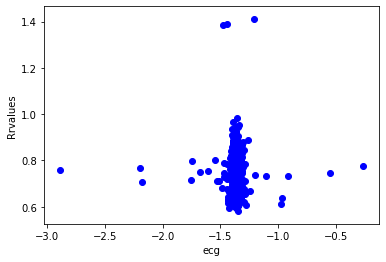

In [132]:
#graph of SNO vs r-r values

plt.scatter(cdf.ecg, cdf.Rrvalues,color='blue')
plt.xlabel('ecg')
plt.ylabel('Rrvalues')
plt.show()

In [133]:
#splitting our data in 80-20 ratio for regression

In [134]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

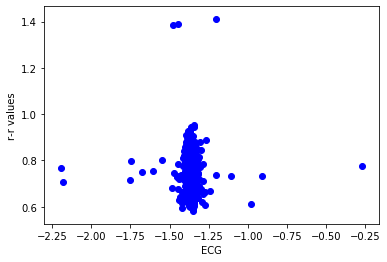

In [135]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.xlabel("ECG")
plt.ylabel("r-r values")
plt.show()

In [136]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.0365106]]
Intercept:  [0.70556526]


Text(0, 0.5, 'r-r values')

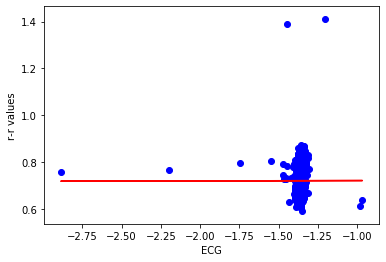

In [112]:
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ECG")
plt.ylabel("r-r values")

In [137]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -870.85


In [138]:
#using polynomial regression

In [139]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.397     ,  1.951609  ],
       [ 1.        , -1.3831    ,  1.91296561],
       [ 1.        , -1.3663    ,  1.86677569],
       ...,
       [ 1.        , -1.3521    ,  1.82817441],
       [ 1.        , -1.3615    ,  1.85368225],
       [ 1.        , -1.3784    ,  1.89998656]])

In [140]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.03803257 -0.00056808]]
Intercept:  [0.70454689]


Text(0, 0.5, 'Rrvalues')

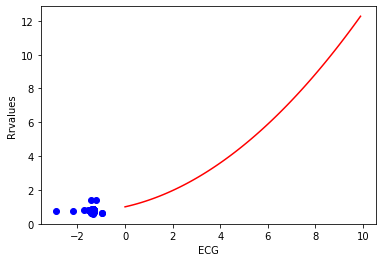

In [117]:
#plotting the polynomial regression
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ECG")
plt.ylabel("Rrvalues")

In [141]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -895.89
